In [1]:
# NN Libraries
import tensorflow as tf
import tensorflow.keras.backend as kb
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn import preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read Raw Data
### Data Structure:
### Meta-data: GamePlayID, Returner ID, Returner's teammates' ID, Tackling team's ID, 
### Returner's tracking data, Returner's teammate's tracking data
### Tackling team's tracking data
### Tracking data includes: x, y, s, a, dis, o, dir, an, d
##### x, y, s, a, dis, o, dir remain the same as NFL's definition.
##### an is the angle between a player and returner
##### d is the euclidean distance between a player and returner

tackleFileName = 'AnalyzedData/biggg.csv' # read player data for each frame
pitchControlFileName = 'AnalyzedData/spaceValues.csv' # read pitch control score for each frame

tackleData = pd.read_csv(tackleFileName, header=0, index_col=0)
pitchControlData = pd.read_csv(pitchControlFileName, header=0, index_col=0)

# Select usableData (i.e. disregard meta-data such as Game ID, Play ID for training purposes)
colNames = tackleData.columns
colNamesX = colNames[24:220]
colNamesY_outcome = colNames[231:232]
colNamesY_identity = colNames[220:231]

# X_raw: raw input feature matrix (stored in pandas dataframe)
X_raw = tackleData[colNamesX]

# Y: output matrix (stored in pandas dataframe)
Y_outcome = tackleData[colNamesY_outcome]
Y_identity = tackleData[colNamesY_identity]

# define nRow, nFeature
nRow = X_raw.shape[0]
nFeature = X_raw.shape[1]

print('number of samples:', nRow)
print('number of input features:', nFeature)
# display(X_raw)
# display(Y_outcome)
# display(Y_identity)

number of samples: 28480
number of input features: 196


In [3]:
# Data Scaling for NN

min_max_scaler = preprocessing.MinMaxScaler() 
X_scaled = min_max_scaler.fit_transform(X=X_raw) # linearly scale to range [0, 1]
# relNData = preprocessing.normalize(relData) # scale to N(0, 1)
print('Shape of the scaled input matrix is:', X_scaled.shape)

Shape of the scaled input matrix is: (28480, 196)


In [5]:
# # Explanatory Data Analysis
# from sklearn.decomposition import PCA

# XY = X_scaled
# XY['Y'] = Y_outcome.to_numpy()

# pca = PCA(n_components=nFeature+1)
# pca.fit(XY)

# # print('PCA explained variance ratio:', '\n', pca.explained_variance_ratio_, '\n')
# # print('PCA singular values:', '\n', pca.singular_values_, '\n')

# corr_matrix = np.corrcoef(XY.T)
# print('Shape of covariance matrix is:', corr_matrix.shape)
# print('Correlation between all input features and Y:', '\n', np.round(corr_matrix[nFeature]*100, ), '\n')

In [7]:
# Randomly selecting training data
trainPct = 0.8 # select how many data to use in the training set (range = [0, 1])

# indexes
np.random.seed(seed=1)
trainIndex = np.random.choice(nRow, int(nRow * trainPct), replace=False)
testIndex = np.setdiff1d(np.array(range(nRow)), trainIndex)

# data seperation (all data stored in numpy ndarray)
X_train = X_scaled[trainIndex]
Y_outcome_train = Y_outcome.to_numpy()[trainIndex]
Y_identity_train = Y_identity.to_numpy()[trainIndex]

X_test = X_scaled[testIndex]
Y_outcome_test = Y_outcome.to_numpy()[testIndex]
Y_identity_test = Y_identity.to_numpy()[testIndex]

print('Number of input features :', nFeature)
print('Training set has', len(Y_outcome_train), 'frames.')
print('Training set tackling rate is:', sum(Y_outcome_train)/len(Y_outcome_train)*100, '%')
print('Validation set has', len(Y_outcome_test), 'frames.')
print('Validation set tackling rate is:', sum(Y_outcome_test)/len(Y_outcome_test)*100, '%')
print(X_train.shape)

Number of input features : 196
Training set has 22784 frames.
Training set tackling rate is: [77.11551966] %
Validation set has 5696 frames.
Validation set tackling rate is: [77.28230337] %
(22784, 196)


Epoch 1/4000
712/712 [==============================] - 1s 937us/step - loss: 0.5517 - accuracy: 0.7697 - val_loss: 0.5325 - val_accuracy: 0.7728
Epoch 2/4000
712/712 [==============================] - 1s 745us/step - loss: 0.5405 - accuracy: 0.7709 - val_loss: 0.5272 - val_accuracy: 0.7728
Epoch 3/4000
712/712 [==============================] - 1s 712us/step - loss: 0.5349 - accuracy: 0.7711 - val_loss: 0.5248 - val_accuracy: 0.7728
Epoch 4/4000
712/712 [==============================] - 1s 718us/step - loss: 0.5315 - accuracy: 0.7708 - val_loss: 0.5224 - val_accuracy: 0.7728
Epoch 5/4000
712/712 [==============================] - 1s 716us/step - loss: 0.5293 - accuracy: 0.7709 - val_loss: 0.5188 - val_accuracy: 0.7728
Epoch 6/4000
712/712 [==============================] - 1s 706us/step - loss: 0.5269 - accuracy: 0.7709 - val_loss: 0.5166 - val_accuracy: 0.7728
Epoch 7/4000
712/712 [==============================] - 1s 738us/step - loss: 0.5220 - accuracy: 0.7715 - val_loss: 0.5146 -

Epoch 57/4000
712/712 [==============================] - 1s 721us/step - loss: 0.4707 - accuracy: 0.7827 - val_loss: 0.4815 - val_accuracy: 0.7804
Epoch 58/4000
712/712 [==============================] - 1s 721us/step - loss: 0.4697 - accuracy: 0.7828 - val_loss: 0.4825 - val_accuracy: 0.7823
Epoch 59/4000
712/712 [==============================] - 1s 726us/step - loss: 0.4689 - accuracy: 0.7820 - val_loss: 0.4816 - val_accuracy: 0.7809
Epoch 60/4000
712/712 [==============================] - 1s 713us/step - loss: 0.4683 - accuracy: 0.7831 - val_loss: 0.4818 - val_accuracy: 0.7804
Epoch 61/4000
712/712 [==============================] - 1s 704us/step - loss: 0.4654 - accuracy: 0.7838 - val_loss: 0.4823 - val_accuracy: 0.7809
Epoch 62/4000
712/712 [==============================] - 1s 730us/step - loss: 0.4676 - accuracy: 0.7835 - val_loss: 0.4809 - val_accuracy: 0.7804
Epoch 63/4000
712/712 [==============================] - 1s 805us/step - loss: 0.4654 - accuracy: 0.7830 - val_loss: 0

712/712 [==============================] - 1s 710us/step - loss: 0.4170 - accuracy: 0.8111 - val_loss: 0.4750 - val_accuracy: 0.7874
Epoch 113/4000
712/712 [==============================] - 1s 703us/step - loss: 0.4163 - accuracy: 0.8099 - val_loss: 0.4704 - val_accuracy: 0.7872
Epoch 114/4000
712/712 [==============================] - 1s 711us/step - loss: 0.4147 - accuracy: 0.8102 - val_loss: 0.4739 - val_accuracy: 0.7849
Epoch 115/4000
712/712 [==============================] - 1s 710us/step - loss: 0.4154 - accuracy: 0.8088 - val_loss: 0.4746 - val_accuracy: 0.7916
Epoch 116/4000
712/712 [==============================] - 1s 709us/step - loss: 0.4150 - accuracy: 0.8129 - val_loss: 0.4712 - val_accuracy: 0.7872
Epoch 117/4000
712/712 [==============================] - 1s 706us/step - loss: 0.4131 - accuracy: 0.8139 - val_loss: 0.4713 - val_accuracy: 0.7863
Epoch 118/4000
712/712 [==============================] - 1s 720us/step - loss: 0.4097 - accuracy: 0.8127 - val_loss: 0.4730 - 

712/712 [==============================] - 1s 723us/step - loss: 0.3378 - accuracy: 0.8513 - val_loss: 0.4739 - val_accuracy: 0.7883
Epoch 168/4000
712/712 [==============================] - 1s 722us/step - loss: 0.3376 - accuracy: 0.8516 - val_loss: 0.4739 - val_accuracy: 0.7932
Epoch 169/4000
712/712 [==============================] - 1s 734us/step - loss: 0.3333 - accuracy: 0.8544 - val_loss: 0.4895 - val_accuracy: 0.7741
Epoch 170/4000
712/712 [==============================] - 1s 716us/step - loss: 0.3345 - accuracy: 0.8531 - val_loss: 0.4832 - val_accuracy: 0.7914
Epoch 171/4000
712/712 [==============================] - 1s 751us/step - loss: 0.3317 - accuracy: 0.8537 - val_loss: 0.4802 - val_accuracy: 0.7888
Epoch 172/4000
712/712 [==============================] - 1s 714us/step - loss: 0.3283 - accuracy: 0.8573 - val_loss: 0.4768 - val_accuracy: 0.7930
Epoch 173/4000
712/712 [==============================] - 1s 707us/step - loss: 0.3286 - accuracy: 0.8570 - val_loss: 0.5093 - 

712/712 [==============================] - 1s 718us/step - loss: 0.2491 - accuracy: 0.8973 - val_loss: 0.5092 - val_accuracy: 0.7858
Epoch 223/4000
712/712 [==============================] - 1s 727us/step - loss: 0.2460 - accuracy: 0.8969 - val_loss: 0.5168 - val_accuracy: 0.7967
Epoch 224/4000
712/712 [==============================] - 1s 706us/step - loss: 0.2469 - accuracy: 0.8972 - val_loss: 0.5457 - val_accuracy: 0.8011
Epoch 225/4000
712/712 [==============================] - 1s 711us/step - loss: 0.2468 - accuracy: 0.8971 - val_loss: 0.5305 - val_accuracy: 0.8002
Epoch 226/4000
712/712 [==============================] - 1s 706us/step - loss: 0.2415 - accuracy: 0.8990 - val_loss: 0.5177 - val_accuracy: 0.7916
Epoch 227/4000
712/712 [==============================] - 1s 732us/step - loss: 0.2413 - accuracy: 0.9001 - val_loss: 0.5157 - val_accuracy: 0.7921
Epoch 228/4000
712/712 [==============================] - 1s 724us/step - loss: 0.2415 - accuracy: 0.9000 - val_loss: 0.5400 - 

712/712 [==============================] - 1s 766us/step - loss: 0.1803 - accuracy: 0.9265 - val_loss: 0.5685 - val_accuracy: 0.7992
Epoch 278/4000
712/712 [==============================] - 1s 807us/step - loss: 0.1824 - accuracy: 0.9285 - val_loss: 0.5910 - val_accuracy: 0.8035
Epoch 279/4000
712/712 [==============================] - 1s 822us/step - loss: 0.1811 - accuracy: 0.9266 - val_loss: 0.5555 - val_accuracy: 0.7911
Epoch 280/4000
712/712 [==============================] - 1s 740us/step - loss: 0.1818 - accuracy: 0.9255 - val_loss: 0.5648 - val_accuracy: 0.7976
Epoch 281/4000
712/712 [==============================] - 1s 763us/step - loss: 0.1801 - accuracy: 0.9278 - val_loss: 0.5624 - val_accuracy: 0.7848
Epoch 282/4000
712/712 [==============================] - 1s 755us/step - loss: 0.1793 - accuracy: 0.9268 - val_loss: 0.5729 - val_accuracy: 0.7969
Epoch 283/4000
712/712 [==============================] - 1s 769us/step - loss: 0.1749 - accuracy: 0.9310 - val_loss: 0.5706 - 

712/712 [==============================] - 1s 718us/step - loss: 0.1385 - accuracy: 0.9464 - val_loss: 0.7048 - val_accuracy: 0.8060
Epoch 333/4000
712/712 [==============================] - 1s 715us/step - loss: 0.1378 - accuracy: 0.9443 - val_loss: 0.6324 - val_accuracy: 0.8028
Epoch 334/4000
712/712 [==============================] - 1s 707us/step - loss: 0.1351 - accuracy: 0.9460 - val_loss: 0.6071 - val_accuracy: 0.8000
Epoch 335/4000
712/712 [==============================] - 1s 716us/step - loss: 0.1365 - accuracy: 0.9458 - val_loss: 0.6490 - val_accuracy: 0.8011
Epoch 336/4000
712/712 [==============================] - 1s 718us/step - loss: 0.1361 - accuracy: 0.9478 - val_loss: 0.6234 - val_accuracy: 0.7916
Epoch 337/4000
712/712 [==============================] - 1s 721us/step - loss: 0.1350 - accuracy: 0.9477 - val_loss: 0.6203 - val_accuracy: 0.7911
Epoch 338/4000
712/712 [==============================] - 1s 790us/step - loss: 0.1338 - accuracy: 0.9481 - val_loss: 0.6201 - 

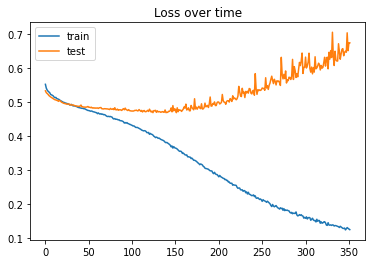

In [8]:
# NN Model for outcome probability prediction

# tuning parameters
learning_rate = 0.001

# model Architecture
outcomeLayers = [keras.layers.Dense(256, activation='relu', input_dim=nFeature),
                 keras.layers.Dropout(0.2),
                 keras.layers.Dense(128, activation='relu'),
                 keras.layers.Dropout(0.2),
                 keras.layers.Dense(1, activation='sigmoid')
                ]
outcomeModel = keras.Sequential(outcomeLayers)

# compile model
sgd = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.8) # stochastic gradient descent as optimizer
adam = keras.optimizers.Adam(learning_rate=learning_rate) #stochastic gradient descent method based on adaptive 
                                                          #estimation of 1st order and 2nd order moments
outcomeModel.compile(loss='binary_crossentropy',
                     optimizer=sgd, 
                     metrics=['accuracy'])

# Early Stopping based on validation loss
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='val_loss', mode='min', verbose=0, save_best_only=True)

historyData = outcomeModel.fit(X_train, Y_outcome_train, validation_data=(X_test, Y_outcome_test),
                               epochs=4000,
                               callbacks=[es], 
                               verbose=1)

_, train_acc = outcomeModel.evaluate(X_train, Y_outcome_train, verbose=0)
_, test_acc = outcomeModel.evaluate(X_test, Y_outcome_test, verbose=0)
print('Training Accuracy: %.3f, Testing Accuracy: %.3f' % (train_acc, test_acc))

plt.plot(historyData.history['loss'], label='train')
plt.plot(historyData.history['val_loss'], label='test')
plt.legend()
plt.title('Loss over time')
plt.show()

Epoch 1/4000
712/712 [==============================] - 1s 880us/step - loss: 2.3413 - accuracy: 0.1423 - val_loss: 2.1184 - val_accuracy: 0.3100
Epoch 2/4000
712/712 [==============================] - 1s 766us/step - loss: 2.0004 - accuracy: 0.2935 - val_loss: 1.6954 - val_accuracy: 0.4098
Epoch 3/4000
712/712 [==============================] - 1s 740us/step - loss: 1.7193 - accuracy: 0.3895 - val_loss: 1.5266 - val_accuracy: 0.4517
Epoch 4/4000
712/712 [==============================] - 1s 735us/step - loss: 1.5659 - accuracy: 0.4353 - val_loss: 1.3771 - val_accuracy: 0.5044
Epoch 5/4000
712/712 [==============================] - 1s 737us/step - loss: 1.4798 - accuracy: 0.4652 - val_loss: 1.2560 - val_accuracy: 0.5402
Epoch 6/4000
712/712 [==============================] - 1s 748us/step - loss: 1.3974 - accuracy: 0.4860 - val_loss: 1.2510 - val_accuracy: 0.5402
Epoch 7/4000
712/712 [==============================] - 1s 742us/step - loss: 1.3297 - accuracy: 0.5091 - val_loss: 1.1541 -

Epoch 57/4000
712/712 [==============================] - 1s 737us/step - loss: 0.5302 - accuracy: 0.7855 - val_loss: 0.5285 - val_accuracy: 0.7570
Epoch 58/4000
712/712 [==============================] - 1s 729us/step - loss: 0.5309 - accuracy: 0.7843 - val_loss: 0.5122 - val_accuracy: 0.7560
Epoch 59/4000
712/712 [==============================] - 1s 733us/step - loss: 0.5541 - accuracy: 0.7780 - val_loss: 0.4866 - val_accuracy: 0.7723
Epoch 60/4000
712/712 [==============================] - 1s 735us/step - loss: 0.5375 - accuracy: 0.7830 - val_loss: 0.4777 - val_accuracy: 0.7798
Epoch 61/4000
712/712 [==============================] - 1s 833us/step - loss: 0.5205 - accuracy: 0.7859 - val_loss: 0.4920 - val_accuracy: 0.7716
Epoch 62/4000
712/712 [==============================] - 1s 955us/step - loss: 0.5207 - accuracy: 0.7892 - val_loss: 0.4934 - val_accuracy: 0.7739
Epoch 63/4000
712/712 [==============================] - 1s 835us/step - loss: 0.5183 - accuracy: 0.7874 - val_loss: 0

712/712 [==============================] - 1s 728us/step - loss: 0.4909 - accuracy: 0.8145 - val_loss: 0.4917 - val_accuracy: 0.7876
Epoch 113/4000
712/712 [==============================] - 1s 732us/step - loss: 0.5089 - accuracy: 0.8075 - val_loss: 0.4746 - val_accuracy: 0.7886
Epoch 114/4000
712/712 [==============================] - 1s 730us/step - loss: 0.5226 - accuracy: 0.8042 - val_loss: 0.5061 - val_accuracy: 0.7755
Epoch 115/4000
712/712 [==============================] - 1s 738us/step - loss: 0.5236 - accuracy: 0.8068 - val_loss: 0.4718 - val_accuracy: 0.7934
Epoch 116/4000
712/712 [==============================] - 1s 731us/step - loss: 0.5539 - accuracy: 0.8004 - val_loss: 0.4940 - val_accuracy: 0.7862
Epoch 117/4000
712/712 [==============================] - 1s 736us/step - loss: 0.5657 - accuracy: 0.7942 - val_loss: 0.4835 - val_accuracy: 0.7909
Epoch 118/4000
712/712 [==============================] - 1s 752us/step - loss: 0.5635 - accuracy: 0.7938 - val_loss: 0.5094 - 

712/712 [==============================] - 1s 728us/step - loss: 0.5749 - accuracy: 0.7960 - val_loss: 0.4750 - val_accuracy: 0.7846
Epoch 168/4000
712/712 [==============================] - 1s 736us/step - loss: 0.5603 - accuracy: 0.7955 - val_loss: 0.4385 - val_accuracy: 0.8074
Epoch 169/4000
712/712 [==============================] - 1s 726us/step - loss: 0.5736 - accuracy: 0.7937 - val_loss: 0.4463 - val_accuracy: 0.8021
Epoch 170/4000
712/712 [==============================] - 1s 734us/step - loss: 0.5602 - accuracy: 0.7978 - val_loss: 0.4634 - val_accuracy: 0.7893
Epoch 171/4000
712/712 [==============================] - 1s 733us/step - loss: 0.5590 - accuracy: 0.7971 - val_loss: 0.4733 - val_accuracy: 0.7935
Epoch 172/4000
712/712 [==============================] - 1s 748us/step - loss: 0.5646 - accuracy: 0.7943 - val_loss: 0.4849 - val_accuracy: 0.7876
Epoch 173/4000
712/712 [==============================] - 1s 744us/step - loss: 0.5472 - accuracy: 0.7996 - val_loss: 0.4372 - 

712/712 [==============================] - 1s 738us/step - loss: 0.5511 - accuracy: 0.8039 - val_loss: 0.4532 - val_accuracy: 0.8085
Epoch 223/4000
712/712 [==============================] - 1s 815us/step - loss: 0.5433 - accuracy: 0.8027 - val_loss: 0.4196 - val_accuracy: 0.8178
Epoch 224/4000
712/712 [==============================] - 1s 751us/step - loss: 0.5575 - accuracy: 0.8012 - val_loss: 0.4255 - val_accuracy: 0.8086
Epoch 225/4000
712/712 [==============================] - 1s 733us/step - loss: 0.5483 - accuracy: 0.8035 - val_loss: 0.4255 - val_accuracy: 0.8048
Epoch 226/4000
712/712 [==============================] - 1s 733us/step - loss: 0.5553 - accuracy: 0.8010 - val_loss: 0.4323 - val_accuracy: 0.8030
Epoch 227/4000
712/712 [==============================] - 1s 728us/step - loss: 0.5515 - accuracy: 0.8021 - val_loss: 0.4377 - val_accuracy: 0.8085
Epoch 228/4000
712/712 [==============================] - 1s 732us/step - loss: 0.5781 - accuracy: 0.7965 - val_loss: 0.4316 - 

712/712 [==============================] - 1s 738us/step - loss: 0.5880 - accuracy: 0.7956 - val_loss: 0.4897 - val_accuracy: 0.7860
Epoch 278/4000
712/712 [==============================] - 1s 734us/step - loss: 0.5949 - accuracy: 0.7952 - val_loss: 0.4197 - val_accuracy: 0.8174
Epoch 279/4000
712/712 [==============================] - 1s 728us/step - loss: 0.5972 - accuracy: 0.7930 - val_loss: 0.4067 - val_accuracy: 0.8251
Epoch 280/4000
712/712 [==============================] - 1s 733us/step - loss: 0.6002 - accuracy: 0.7943 - val_loss: 0.4364 - val_accuracy: 0.8069
Epoch 281/4000
712/712 [==============================] - 1s 728us/step - loss: 0.5894 - accuracy: 0.7963 - val_loss: 0.4484 - val_accuracy: 0.7914
Epoch 282/4000
712/712 [==============================] - 1s 727us/step - loss: 0.5703 - accuracy: 0.7976 - val_loss: 0.4009 - val_accuracy: 0.8285
Epoch 283/4000
712/712 [==============================] - 1s 808us/step - loss: 0.5788 - accuracy: 0.8009 - val_loss: 0.4370 - 

712/712 [==============================] - 1s 759us/step - loss: 0.6693 - accuracy: 0.7698 - val_loss: 0.4620 - val_accuracy: 0.8129
Epoch 333/4000
712/712 [==============================] - 1s 735us/step - loss: 0.6729 - accuracy: 0.7730 - val_loss: 0.4601 - val_accuracy: 0.8121
Epoch 334/4000
712/712 [==============================] - 1s 742us/step - loss: 0.6573 - accuracy: 0.7730 - val_loss: 0.5001 - val_accuracy: 0.7781
Epoch 335/4000
712/712 [==============================] - 1s 737us/step - loss: 0.7049 - accuracy: 0.7608 - val_loss: 0.4733 - val_accuracy: 0.8097
Epoch 336/4000
712/712 [==============================] - 1s 740us/step - loss: 0.6829 - accuracy: 0.7666 - val_loss: 0.4979 - val_accuracy: 0.7981
Epoch 337/4000
712/712 [==============================] - 1s 735us/step - loss: 0.6791 - accuracy: 0.7684 - val_loss: 0.4490 - val_accuracy: 0.8143
Epoch 338/4000
712/712 [==============================] - 1s 738us/step - loss: 0.6928 - accuracy: 0.7636 - val_loss: 0.4464 - 

712/712 [==============================] - 1s 745us/step - loss: 0.8070 - accuracy: 0.7405 - val_loss: 0.5743 - val_accuracy: 0.7909
Epoch 388/4000
712/712 [==============================] - 1s 739us/step - loss: 0.7913 - accuracy: 0.7419 - val_loss: 0.6032 - val_accuracy: 0.7730
Epoch 389/4000
712/712 [==============================] - 1s 750us/step - loss: 0.7937 - accuracy: 0.7417 - val_loss: 0.5819 - val_accuracy: 0.7937
Epoch 390/4000
712/712 [==============================] - 1s 733us/step - loss: 0.7914 - accuracy: 0.7428 - val_loss: 0.5477 - val_accuracy: 0.8037
Epoch 391/4000
712/712 [==============================] - 1s 739us/step - loss: 0.7980 - accuracy: 0.7412 - val_loss: 0.5705 - val_accuracy: 0.7928
Epoch 392/4000
712/712 [==============================] - 1s 732us/step - loss: 0.7802 - accuracy: 0.7463 - val_loss: 0.5238 - val_accuracy: 0.8037
Epoch 393/4000
712/712 [==============================] - 1s 733us/step - loss: 0.7708 - accuracy: 0.7461 - val_loss: 0.5435 - 

712/712 [==============================] - 1s 743us/step - loss: 0.8865 - accuracy: 0.7153 - val_loss: 0.5380 - val_accuracy: 0.7992
Epoch 443/4000
712/712 [==============================] - 1s 759us/step - loss: 0.8889 - accuracy: 0.7180 - val_loss: 0.5554 - val_accuracy: 0.7900
Epoch 444/4000
712/712 [==============================] - 1s 769us/step - loss: 0.8817 - accuracy: 0.7224 - val_loss: 0.5476 - val_accuracy: 0.7948
Epoch 445/4000
712/712 [==============================] - 1s 749us/step - loss: 0.8724 - accuracy: 0.7231 - val_loss: 0.5569 - val_accuracy: 0.7867
Epoch 446/4000
712/712 [==============================] - 1s 763us/step - loss: 0.8730 - accuracy: 0.7214 - val_loss: 0.5681 - val_accuracy: 0.7737
Epoch 447/4000
712/712 [==============================] - 1s 761us/step - loss: 0.8708 - accuracy: 0.7223 - val_loss: 0.5153 - val_accuracy: 0.7990
Epoch 448/4000
712/712 [==============================] - 1s 749us/step - loss: 0.8657 - accuracy: 0.7258 - val_loss: 0.5386 - 

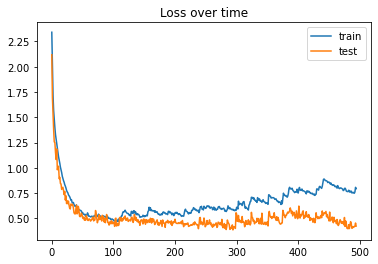

In [9]:
# NN Model for tackler identification

# tuning parameters
learning_rate = 0.001

# model Architecture
identityLayers = [keras.layers.Dense(256, activation='relu', input_dim=nFeature),
                 keras.layers.Dropout(0.2),
                 keras.layers.Dense(128, activation='relu'),
                 keras.layers.Dropout(0.2),
                 keras.layers.Dense(11, activation='softmax')
                ]
identityModel = keras.Sequential(identityLayers)

# compile model
sgd = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.8) # stochastic gradient descent as optimizer
adam = keras.optimizers.Adam(learning_rate=learning_rate) #stochastic gradient descent method based on adaptive 
                                                          #estimation of 1st order and 2nd order moments
identityModel.compile(loss='categorical_crossentropy',
                      optimizer=adam, 
                      metrics=['accuracy'])

# Early Stopping based on validation loss
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='val_loss', mode='min', verbose=0, save_best_only=True)

historyData = identityModel.fit(X_train, Y_identity_train, validation_data=(X_test, Y_identity_test),
                               epochs=4000,
                               callbacks=[es], 
                               verbose=1)

_, train_acc = identityModel.evaluate(X_train, Y_identity_train, verbose=0)
_, test_acc = identityModel.evaluate(X_test, Y_identity_test, verbose=0)
print('Training Accuracy: %.3f, Testing Accuracy: %.3f' % (train_acc, test_acc))

plt.plot(historyData.history['loss'], label='train')
plt.plot(historyData.history['val_loss'], label='test')
plt.legend()
plt.title('Loss over time')
plt.show()